In [173]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import datetime
import os

In [276]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = ''
#exp_name = '2018_01_16_23_13_48_cs-loading-mot-det'
if not exp_name:
    exp_date = datetime.datetime.now().strftime("%Y_%m_%d")
    search_path = os.path.join(dp, exp_date)
    exp_name = os.listdir(search_path)[-1]
    print exp_name
else:    
    exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[15],[2]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

2018_01_18_08_31_19_cs-readout
name 'fort_exp' is not defined


In [277]:
print(q.experiments[0]['variable_list'])
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

[u'Ix']


In [278]:
retention = q.apply_thresholds()

no loading observed
no loading observed
no loading observed
no loading observed


In [279]:
tbl_str = "ivar:\t{0:.4f}\tloading:{1:.3f}\tretention:{2:.3f} +- {3:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['loading'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.1500	loading:0.005	retention:0.600 +- 0.184
ivar:	0.1600	loading:0.008	retention:0.625 +- 0.144
ivar:	0.1700	loading:0.012	retention:0.500 +- 0.121
ivar:	0.1800	loading:0.007	retention:0.714 +- 0.144
ivar:	0.1900	loading:0.016	retention:0.812 +- 0.082
ivar:	0.2000	loading:0.004	retention:0.500 +- 0.210
ivar:	0.2100	loading:0.009	retention:0.667 +- 0.132
ivar:	0.2200	loading:0.004	retention:0.250 +- 0.182
ivar:	0.2300	loading:0.001	retention:1.000 +- 0.420
ivar:	0.2400	loading:0.000	retention:nan +- nan
ivar:	0.2500	loading:0.000	retention:nan +- nan


In [280]:
q.save_experiment_data()

<IPython.core.display.Javascript object>


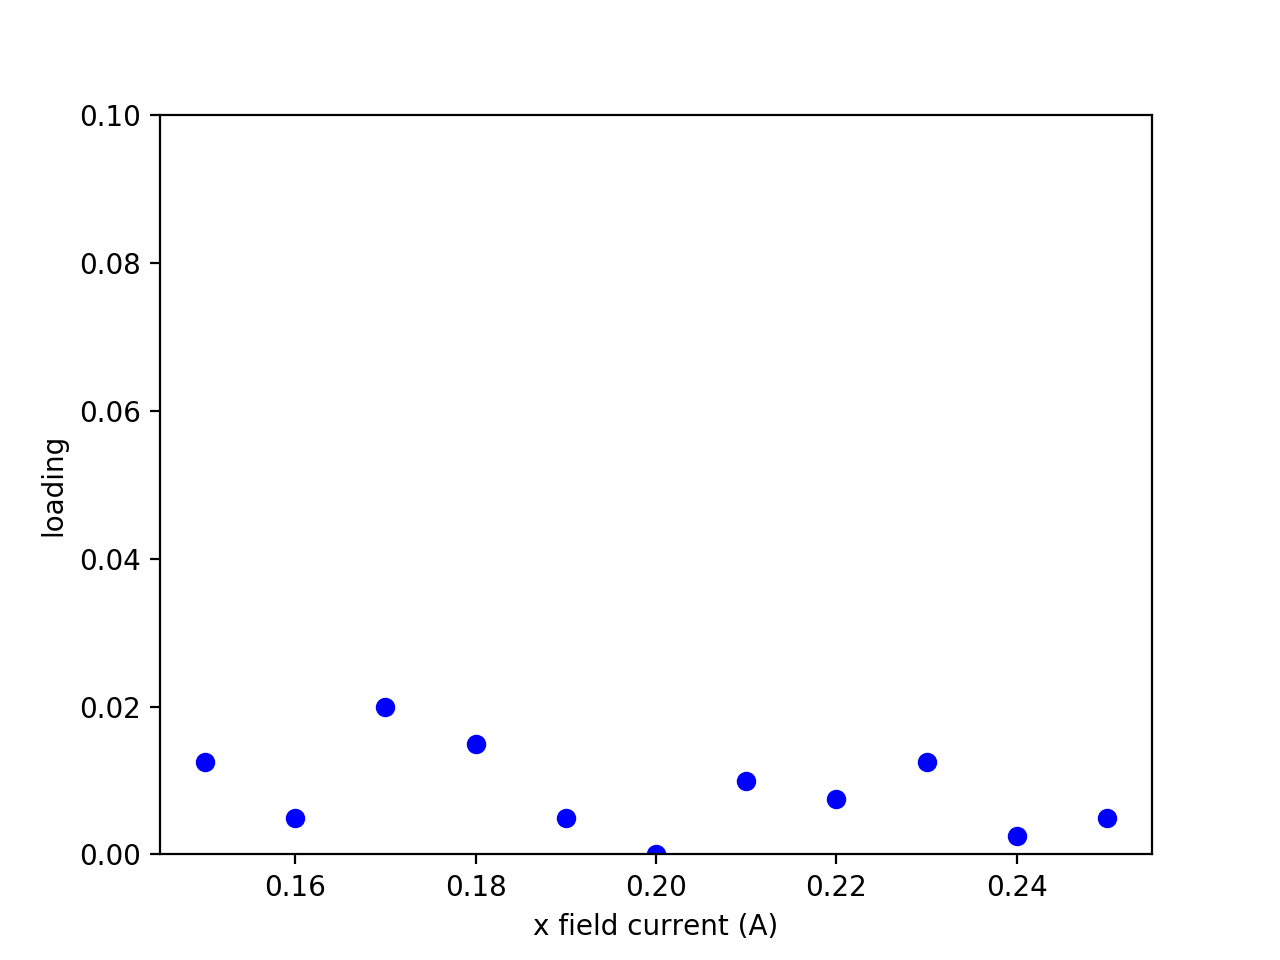

In [248]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.plot(retention['ivar'][e], retention['loading'][e], 'bo')
ax.set_ylim(0, 0.1)
ax.set_xlabel(xlab)
ax.set_ylabel('loading')

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'loading_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


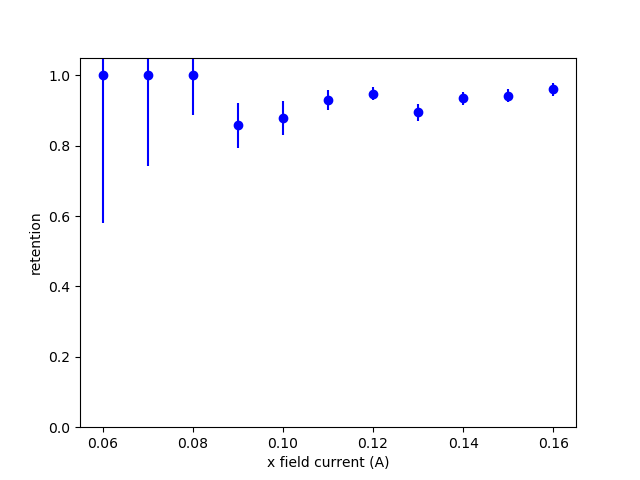

Text(0,0.5,u'retention')

In [166]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')